In [83]:
import geopandas as gpd
import pandas as pd
import urllib.request
import json
import time

In [34]:
simp = 'True'

In [35]:
simp.lower()

'true'

In [121]:
def getDelin(state,lat,lon, param='false', simplify = 'true', crs = 4326):
    '''
    Parameters
    ----------
    state : str
        Two digit state code.
    lat : float
        Vertical coordinate in the CRS.
    lon : float
        Horizontal coordinate in the CRS. 
    param : str
        Comma separated list of parameters to return, or 'false' for none, 'true' for all. 
    simplify : str
        true or false if the API should return a simplified polygon.
    crs : int
        EPSG coordinate reference system code, defaults to 4326.
        
    Returns
    -------
    ws : geodataframe
        Watershed polygon in a geopandas geodataframe
    workspaceID : str
        StreamStats Services workspaceID
    '''
    url = ('https://streamstats.usgs.gov/streamstatsservices/watershed.geojson'+\
    '?rcode=%s&xlocation=%s&ylocation=%s&crs=%s&includeparameters=%s&'+\
    'includeflowtypes=false&includefeatures=true&simplify=%s')%(state,lon,lat,crs,param,simplify.lower())
    resp = urllib.request.urlopen(url)
    dat = json.loads(resp.read())
    ws = gpd.read_file(json.dumps(dat['featurecollection'][1]['feature']))
    pp = gpd.read_file(json.dumps(dat['featurecollection'][0]['feature']))
    
    return ws,pp,dat['workspaceID']
    

In [122]:
state = 'NH'
lat = 44.59762
lon = -71.93918
param = 'CSL10_85'

ws,pp,ID = getDelin(state,lat,lon, param=param)
#ws = getBasinChar(ws, param)

In [128]:
lats = [44.59762,44.65352788518699,44.70249,44.71388]
lons = [-71.93918,-71.89234256744385,-71.87005,-71.87129]

watersheds = []
pourPoints = []
for lat,lon in zip(lats,lons):
    state = 'NH'
    param = 'CSL10_85'
    
    ws,pp,ID = getDelin(state,lat,lon,param=param)
    
    watersheds.append(ws)
    pourPoints.append(pp)

In [129]:
watersheds = pd.concat(watersheds)
pourPoints = pd.concat(pourPoints)

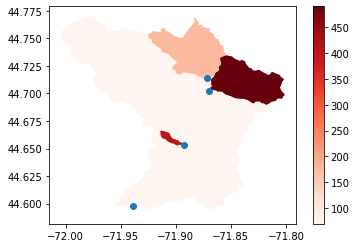

In [130]:
ax = watersheds.plot('CSL10_85', cmap ='Reds', legend=True)
pourPoints.plot(ax=ax)

In [132]:
watersheds.to_file('./data/longest_flowpath/test_watersheds.geojson', format='GeoJSON')
pourPoints.to_file('./data/longest_flowpath/test_pourPoints.geojson', format='GeoJSON')

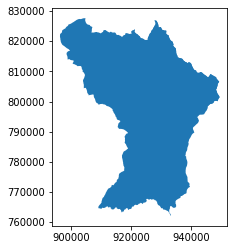

In [119]:
watersheds.to_crs(epsg=3437).plot()

In [3]:
pourPoints

,lats,lons
0,44.59762,-71.93918


In [47]:
url = 'https://streamstats.usgs.gov/streamstatsservices/parameters.json?rcode=NH&workspaceID=NH20200124200401031000&includeparameters=CSL10_85'
resp = urllib.request.urlopen(url)

In [48]:
dat = json.loads(resp.read())

In [52]:
dat['parameters'][0]['value']

69.7

In [30]:
ws = gpd.read_file(json.dumps(dat['featurecollection'][1]['feature']))

In [37]:
dat['workspaceID']

'NH20200124194337583000'

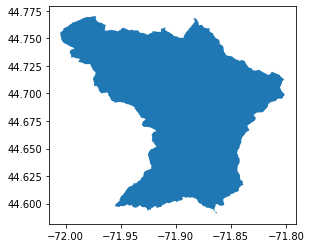

In [31]:
ws.plot()

In [4]:
gpd.read_file(filename='https://streamstats.usgs.gov/streamstatsservices/watershed.geojson?rcode=NH&xlocation=-71.93918&ylocation=44.59762&crs=4326&includeparameters=false&includeflowtypes=false&includefeatures=true&simplify=true')

DriverError: Failed to read GeoJSON data